In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats

In [2]:
df = {}

csv_file = "coal_price_data.csv"
csv_date = "date"
csv_file = csv_file.split(".")[0]
df[csv_file] = pd.read_csv(f"../coal-price-data/{csv_file}.csv")
df[csv_file]["datetime"] = pd.to_datetime(
    df[csv_file][csv_date], format="%b-%y"
)

csv_file = "gdp_indonesia.csv"
csv_date = "date"
csv_date_format = "%Y"
csv_file = csv_file.split(".")[0]
df[csv_file] = pd.read_csv(f"../coal-price-data/worldbank/{csv_file}.csv")
df[csv_file]["datetime"] = pd.to_datetime(
    df[csv_file][csv_date], format=csv_date_format
)

csv_path = "../coal-price-data/fred/"
csv_date = "DATE"
csv_date_start = "2011-11-01"
csv_date_end = "2023-12-01"
csv_list = os.listdir(csv_path)
for csv_file in csv_list:
    csv_file = csv_file.split(".")[0]
    df[csv_file] = pd.read_csv(f"../coal-price-data/fred/{csv_file}.csv")
    df[csv_file]["datetime"] = pd.to_datetime(
        df[csv_file][csv_date], format="%Y-%m-%d"
    )
    # df[csv_file] = df[csv_file].loc[
    #     (df[csv_file]["datetime"] >= csv_date_start)
    #     & (df[csv_file]["datetime"] < csv_date_end)
    # ]

In [3]:
df["gdp_indonesia"].max()

date                        2022
gdp         1319100220407.719971
datetime     2022-01-01 00:00:00
dtype: object

In [4]:
df["gdp_indonesia"] = df["gdp_indonesia"].loc[
    (df["gdp_indonesia"]["datetime"] >= "1990-01-01")
    & (df["gdp_indonesia"]["datetime"] < "2022-02-01")
]

In [5]:
df["gdp_indonesia"].max()

date                        2022
gdp         1319100220407.719971
datetime     2022-01-01 00:00:00
dtype: object

In [6]:
y = "gdp"
fig = px.line(
    df["gdp_indonesia"], x="datetime", y=y, labels={"Month": "Date"}
)
fig.update_layout(
    template="simple_white",
    font=dict(size=18),
    title_text="GDP Indonesia by World Bank (USD)",
    width=650,
    title_x=0.5,
    height=400,
)
fig.show()

In [7]:
df["IDNRECM"]

DATE  IDNRECM   datetime
0    1990-02-01      1.0 1990-02-01
1    1990-03-01      1.0 1990-03-01
2    1990-04-01      1.0 1990-04-01
3    1990-05-01      1.0 1990-05-01
4    1990-06-01      1.0 1990-06-01
..          ...      ...        ...
383  2022-01-01      0.0 2022-01-01
384  2022-02-01      0.0 2022-02-01
385  2022-03-01      0.0 2022-03-01
386  2022-04-01      0.0 2022-04-01
387  2022-05-01      0.0 2022-05-01

[388 rows x 3 columns]

In [8]:
df["IDNRECM"] = df["IDNRECM"].loc[
    (df["IDNRECM"]["datetime"] >= "1990-01-01")
    & (df["IDNRECM"]["datetime"] < "2022-02-01")
]

In [9]:
df["IDNRECM"]

DATE  IDNRECM   datetime
0    1990-02-01      1.0 1990-02-01
1    1990-03-01      1.0 1990-03-01
2    1990-04-01      1.0 1990-04-01
3    1990-05-01      1.0 1990-05-01
4    1990-06-01      1.0 1990-06-01
..          ...      ...        ...
379  2021-09-01      0.0 2021-09-01
380  2021-10-01      0.0 2021-10-01
381  2021-11-01      0.0 2021-11-01
382  2021-12-01      0.0 2021-12-01
383  2022-01-01      0.0 2022-01-01

[384 rows x 3 columns]

In [10]:
df["IDNRECM"] = df["IDNRECM"][df["IDNRECM"]['datetime'].dt.month == 1]

In [11]:
df["IDNRECM"].head()

DATE  IDNRECM   datetime
11  1991-01-01      1.0 1991-01-01
23  1992-01-01      1.0 1992-01-01
35  1993-01-01      1.0 1993-01-01
47  1994-01-01      0.0 1994-01-01
59  1995-01-01      0.0 1995-01-01

In [12]:
df["IDNRECM"]['Result'] = df["IDNRECM"]['IDNRECM'].apply(lambda x: 1319100220407 if x>0 else 0)

/var/folders/fj/ycln97zn6b1ckstg6ksdmgl80000gp/T/ipykernel_16548/2627926293.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
y = "IDNRECM"
fig = px.area(
    df["IDNRECM"], x="datetime", y=y, labels={"Month": "Date"}
)
fig.update_layout(
    template="simple_white",
    font=dict(size=18),
    title_text="Indonesia Recession by OECD",
    bargap=0,
    width=650,
    title_x=0.5,
    height=400,
)
fig.show()

In [14]:
import plotly.express as px
import plotly.graph_objects as go

fruits = ["apples", "oranges", "bananas"]
fig = px.line(x=df["gdp_indonesia"]["datetime"], y=df["gdp_indonesia"]["gdp"], color=px.Constant("GDP Indonesia"),
             labels=dict(x="Date", y="USD", color="Time Period"))
fig.add_bar(x=df["IDNRECM"]["datetime"], y=df["IDNRECM"]["Result"], name="Recession",opacity = 0.5)

fig.show()

In [15]:
import plotly.express as px
from plotly.subplots import make_subplots

subfig = make_subplots(specs=[[{"secondary_y": True}]])

# fig = px.area(df, x="Decade", y="Financial_Impact", color="Disaster_Type", color_discrete_sequence=["#FDB714", "#009CA7", "#F05023"])
fig = px.area(df["IDNRECM"], x=df["IDNRECM"]["datetime"], y=df["IDNRECM"]["Result"],color_discrete_sequence=["#F05023"])
# fig2 = px.line(df, x="Decade",y=df.C)
fig2 = px.line(df["gdp_indonesia"], x=df["gdp_indonesia"]["datetime"],y=df["gdp_indonesia"]["gdp"])

fig.update_traces(yaxis="y2",showlegend=True,name='Indonesia Recession')
fig2.update_traces(yaxis="y2",showlegend=True,name='GDP Indonesia')
subfig.add_traces(fig.data + fig2.data)

subfig.layout.xaxis.title="Date"
subfig.layout.yaxis.title="Financial Impact"
subfig.layout.yaxis2.title="USD"
subfig.layout.title="Indonesia Economy"

subfig.show()

In [16]:
df["IDNRECM"]

DATE  IDNRECM   datetime         Result
11   1991-01-01      1.0 1991-01-01  1319100220407
23   1992-01-01      1.0 1992-01-01  1319100220407
35   1993-01-01      1.0 1993-01-01  1319100220407
47   1994-01-01      0.0 1994-01-01              0
59   1995-01-01      0.0 1995-01-01              0
71   1996-01-01      0.0 1996-01-01              0
83   1997-01-01      0.0 1997-01-01              0
95   1998-01-01      1.0 1998-01-01  1319100220407
107  1999-01-01      0.0 1999-01-01              0
119  2000-01-01      0.0 2000-01-01              0
131  2001-01-01      0.0 2001-01-01              0
143  2002-01-01      0.0 2002-01-01              0
155  2003-01-01      0.0 2003-01-01              0
167  2004-01-01      1.0 2004-01-01  1319100220407
179  2005-01-01      0.0 2005-01-01              0
191  2006-01-01      0.0 2006-01-01              0
203  2007-01-01      0.0 2007-01-01              0
215  2008-01-01      0.0 2008-01-01              0
227  2009-01-01      1.0 2009-01-01  1319100220407
239  2010-01-01      0.0 2010-01-01              0
251  2011-01-01      0.0 2011-01-01              0
263  2012-01-01      0.0 2012-01-01              0
275  2013-01-01      1.0 2013-01-01  1319100220407
287  2014-01-01      1.0 2014-01-01  1319100220407
299  2015-01-01      1.0 2015-01-01  1319100220407
311  2016-01-01      0.0 2016-01-01              0
323  2017-01-01      0.0 2017-01-01              0
335  2018-01-01      0.0 2018-01-01              0
347  2019-01-01      0.0 2019-01-01              0
359  2020-01-01      1.0 2020-01-01  1319100220407
371  2021-01-01      0.0 2021-01-01              0
383  2022-01-01      0.0 2022-01-01              0

In [17]:
y = "gdp"
fig = px.line(
    df["gdp_indonesia"], x="datetime", y=y, labels={"Month": "Date"}
)
fig.update_layout(
    template="simple_white",
    font=dict(size=18),
    title_text="GDP Indonesia by World Bank (USD)",
    width=650,
    title_x=0.5,
    height=400,
)
y = "IDNRECM"
fig = px.line(
    df["IDNRECM"], x="datetime", y=y, labels={"Month": "Date"}
)
fig.update_layout(
    template="simple_white",
    font=dict(size=18),
    title_text="Indonesia Recession by OECD",
    width=650,
    title_x=0.5,
    height=400,
)
fig.show()

In [18]:
print(df["coal_price_data"].min())
print(df["coal_price_data"].max())
print(df["M2SL"].min())
print(df["M2SL"].max())

year                        2011
date                      Apr-12
newcastle                   48.8
HBA                        49.42
ICI_1                      52.93
datetime     2011-12-01 00:00:00
dtype: object
year                        2023
date                      Sep-23
newcastle                  433.7
HBA                       330.97
ICI_1                     277.62
datetime     2023-12-01 00:00:00
dtype: object
DATE                 1959-01-01
M2SL                      286.6
datetime    1959-01-01 00:00:00
dtype: object
DATE                 2023-12-01
M2SL                    21703.5
datetime    2023-12-01 00:00:00
dtype: object


In [19]:
y = "newcastle"
fig = px.line(
    df["coal_price_data"], x="datetime", y=y, labels={"Month": "Date"}
)
fig.update_layout(
    template="simple_white",
    font=dict(size=18),
    title_text="Coal Price",
    width=650,
    title_x=0.5,
    height=400,
)
fig.show()

In [20]:
y = "M2SL"
fig = px.line(df[y], x="datetime", y=y, labels={"Month": "Date"})
fig.update_layout(
    template="simple_white",
    font=dict(size=18),
    title_text=y,
    width=650,
    title_x=0.5,
    height=400,
)
fig.show()

slope: 0.6005339354037651
intercept: 33.653814011599124
r: 0.9606500704209071
p: 1.9310655623954912e-81
std_err: 0.014520325118984507


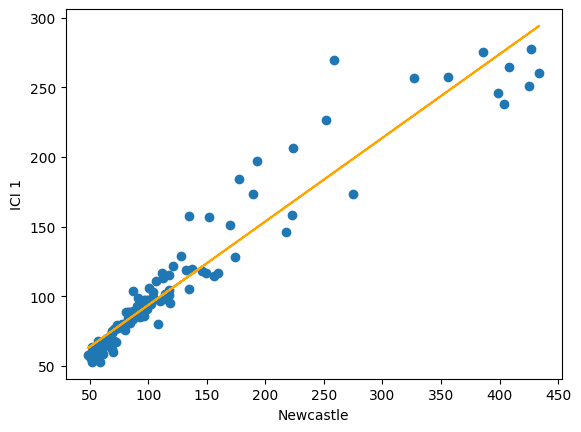

In [21]:
def myfunc(x):
    return slope * x + intercept


x = df["coal_price_data"].newcastle
y = df["coal_price_data"].ICI_1

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"r: {r}")
print(f"p: {p}")
print(f"std_err: {std_err}")


mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color="orange")
plt.xlabel("Newcastle")
plt.ylabel("ICI 1")
plt.show()

In [22]:
y_axis = "M2SL"

In [23]:
fig = make_subplots(rows = 1,cols = 2)

x = df["coal_price_data"]["newcastle"]
y = df["M2SL"][y_axis]
mymodel = list(map(myfunc, x))
fig.add_trace(go.Scatter(x=x,y=mymodel),row = 1,col = 1)

x = df["coal_price_data"].newcastle
y = df["coal_price_data"].ICI_1
mymodel = list(map(myfunc, x))
fig.add_trace(go.Scatter(x=x,y=mymodel),row = 1,col = 2)
fig.update_layout(height = 600,width = 800,title = "Side by Side Line Plots")
fig.show()